In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
def mean_pool(image, pool):
    M, N, P = image.shape
    K ,L, J = pool
    MK = M // K
    NK = N // L
    PK = P // J
    
    return image[:MK*K, :NK*L, :PK*J].reshape(MK, K, NK, L, PK, J).mean(axis=(1, 3, 5))

In [26]:
import SimpleITK as sitk
real_p = sitk.GetArrayFromImage(sitk.ReadImage("./optiDose_PZ3_doseduodeno5_dosedcrtl1.5_peso4_red10x5.mhd", sitk.sitkFloat32))
real_p = np.flip(real_p.transpose(),0)
real_p = mean_pool(real_p, (16,16,8))
print(real_p.shape)

(32, 32, 23)


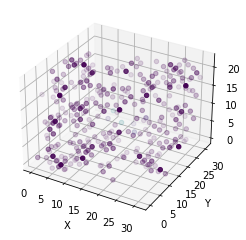

In [32]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Sample 3D dose map (replace this with your actual dose map data)
dose_map = real_p  # Example 10x10x10 dose map

# Create a meshgrid for x, y, z coordinates
x, y, z = np.meshgrid(range(dose_map.shape[0]),
                      range(dose_map.shape[1]),
                      range(dose_map.shape[2]))

# Flatten the dose map and coordinates
x = x.flatten()
y = y.flatten()
z = z.flatten()
dose = dose_map.flatten()

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

alpha = (dose - np.min(dose)) / (np.max(dose)-np.min(dose))
alpha[alpha<0.1] = 0

# Plot each voxel with opacity proportional to dose value

ax.scatter(x, y, z, c=alpha, alpha = alpha)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

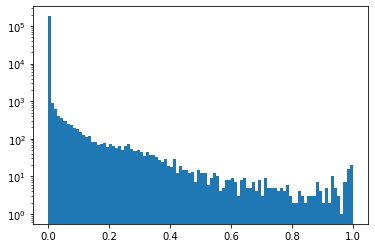

In [20]:
%matplotlib inline
plt.hist(alpha, bins=100)
plt.yscale('log')
plt.show()